### 과적합 피하기 - 초음파 광물 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
from google.colab import files
up = files.upload()

Saving sonar.csv to sonar.csv


In [5]:
df = pd.read_csv('sonar.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [8]:
# X data : scaling
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df[df.columns[:-1]].values)

In [9]:
# Y data : label encoding
from sklearn.preprocessing import LabelEncoder
y_labeled = LabelEncoder().fit_transform(df[60].values)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_labeled, stratify=y_labeled, test_size=0.2,
    random_state=seed
)

### 모델 정의/설정/학습/결과

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- case 1) 은닉층 2개

In [12]:
model = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid'),  
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                4880      
                                                                 
 dense_1 (Dense)             (None, 12)                972       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile('adam', 'binary_crossentropy', ['accuracy'])
hist1 = model.fit(X_train, y_train, validation_split=0.2,
          epochs=200, batch_size=100, verbose=0)

In [18]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.3303 - accuracy: 0.9048


[0.33029451966285706, 0.9047619104385376]

In [31]:
params1, acc1 = 5865, 0.9048

In [20]:
model2 = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(48, activation='relu'),
    Dense(20, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),  
])

In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                4880      
                                                                 
 dense_4 (Dense)             (None, 48)                3888      
                                                                 
 dense_5 (Dense)             (None, 20)                980       
                                                                 
 dense_6 (Dense)             (None, 8)                 168       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [22]:
model2.compile('adam', 'binary_crossentropy', ['accuracy'])
hist2 = model2.fit(X_train, y_train, validation_split=0.2,
          epochs=200, batch_size=100, verbose=0)

In [28]:
model2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.4749 - accuracy: 0.8571


[0.4749058187007904, 0.8571428656578064]

In [24]:
params2, acc2 = 9925, 0.8571

- Case3) 은닉층 6개

In [36]:
model3 = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(64, activation='relu'),
    Dense(40, activation='relu'),        
    Dense(24, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid'),  
])

In [37]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 80)                4880      
                                                                 
 dense_24 (Dense)            (None, 64)                5184      
                                                                 
 dense_25 (Dense)            (None, 40)                2600      
                                                                 
 dense_26 (Dense)            (None, 24)                984       
                                                                 
 dense_27 (Dense)            (None, 10)                250       
                                                                 
 dense_28 (Dense)            (None, 4)                 44        
                                                                 
 dense_29 (Dense)            (None, 1)                

In [38]:
model3.compile('adam', 'binary_crossentropy', ['accuracy'])
hist3 = model3.fit(X_train, y_train, validation_split=0.2,
          epochs=200, batch_size=100, verbose=0)

In [39]:
model3.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.9334 - accuracy: 0.8095


[0.933374285697937, 0.8095238208770752]

In [30]:
params3, acc3 = 13947, 0.8571

 - Case4) 은닉층 8개

In [40]:
model4 = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(64, activation='relu'),
    Dense(48, activation='relu'),    
    Dense(36, activation='relu'),        
    Dense(28, activation='relu'),
    Dense(16, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid'),  
])
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 80)                4880      
                                                                 
 dense_31 (Dense)            (None, 64)                5184      
                                                                 
 dense_32 (Dense)            (None, 48)                3120      
                                                                 
 dense_33 (Dense)            (None, 36)                1764      
                                                                 
 dense_34 (Dense)            (None, 28)                1036      
                                                                 
 dense_35 (Dense)            (None, 16)                464       
                                                                 
 dense_36 (Dense)            (None, 4)                

In [41]:
model4.compile('adam', 'binary_crossentropy', ['accuracy'])
hist4 = model4.fit(X_train, y_train, validation_split=0.2,
          epochs=200, batch_size=100, verbose=0)

In [42]:
model4.evaluate(X_test, y_test)

2/2 [==============================] - 0s 16ms/step - loss: 0.9673 - accuracy: 0.8095


[0.9673464894294739, 0.8095238208770752]

In [ ]:
params3, acc3 = 16,521, 0.8571

In [44]:
y_acc1 = hist1.history['accuracy']
y_acc2 = hist2.history['accuracy']
y_acc3 = hist3.history['accuracy']
y_acc4 = hist4.history['accuracy']
y_vloss1 = hist1.history['val_loss']
y_vloss2 = hist2.history['val_loss']
y_vloss3 = hist3.history['val_loss']
y_vloss4 = hist4.history['val_loss']
xs = np.arange(1, len(y_acc1) + 1)

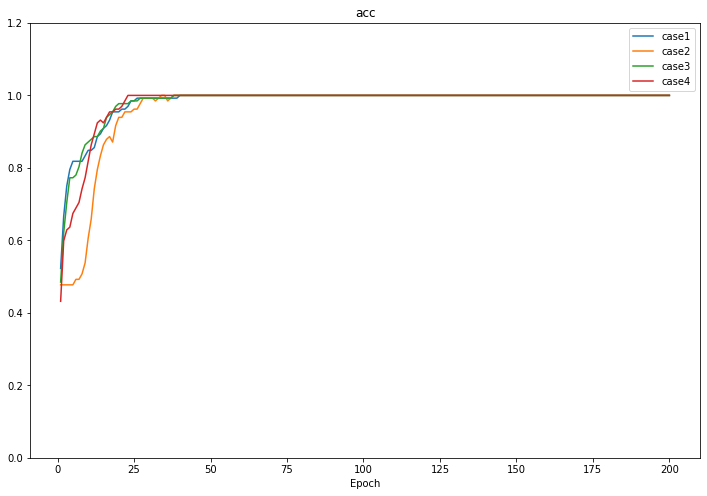

In [47]:
plt.figure(figsize=(12, 8))

plt.plot(xs, y_acc1, label='case1')



plt.plot(xs, y_acc2, label='case2')



plt.plot(xs, y_acc3, label='case3')

plt.legend(), plt.grid()


plt.plot(xs, y_acc4, label='case4')

plt.legend(), plt.grid()

plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('acc')



plt.show()

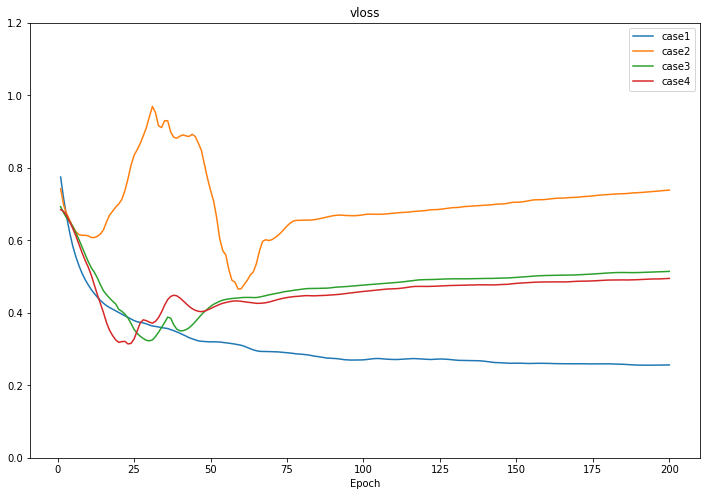

In [48]:
plt.figure(figsize=(12, 8))


plt.plot(xs, y_vloss1, label='case1')



plt.plot(xs, y_vloss2, label='case2')



plt.plot(xs, y_vloss3, label='case3')
plt.legend(), plt.grid()



plt.plot(xs, y_vloss4, label='case4')
plt.legend(), plt.grid()

plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('vloss')



plt.show()

 - case2 model

In [86]:
model = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(48, activation='relu'),
    Dense(20, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),  
])

In [87]:
model.compile('adam', 'binary_crossentropy', ['accuracy'])

- 베스트 모델만 저장하는 콜백 함수

In [88]:
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('sonar_best.h5', monitor='val_loss',
                     verbose=1, save_best_only=True)

In [89]:
# epoch가 종료될 때 마다 callback 함수를 실행하도록 설정
hist = model.fit(X_train, y_train, validation_split=0.2,
          epochs=200, batch_size=100, verbose=0,
          callbacks=[mc])


Epoch 1: val_loss improved from inf to 0.68776, saving model to sonar_best.h5

Epoch 2: val_loss improved from 0.68776 to 0.65990, saving model to sonar_best.h5

Epoch 3: val_loss improved from 0.65990 to 0.63526, saving model to sonar_best.h5

Epoch 4: val_loss improved from 0.63526 to 0.61386, saving model to sonar_best.h5

Epoch 5: val_loss improved from 0.61386 to 0.59457, saving model to sonar_best.h5

Epoch 6: val_loss improved from 0.59457 to 0.57560, saving model to sonar_best.h5

Epoch 7: val_loss improved from 0.57560 to 0.55782, saving model to sonar_best.h5

Epoch 8: val_loss improved from 0.55782 to 0.54056, saving model to sonar_best.h5

Epoch 9: val_loss improved from 0.54056 to 0.52352, saving model to sonar_best.h5

Epoch 10: val_loss improved from 0.52352 to 0.50621, saving model to sonar_best.h5

Epoch 11: val_loss improved from 0.50621 to 0.48877, saving model to sonar_best.h5

Epoch 12: val_loss improved from 0.48877 to 0.47211, saving model to sonar_best.h5

Epoc

In [90]:
from tensorflow.keras.models import load_model

best_model = load_model('sonar_best.h5')

best_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.3697 - accuracy: 0.7857


[0.36972105503082275, 0.7857142686843872]

In [93]:
del model

In [91]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

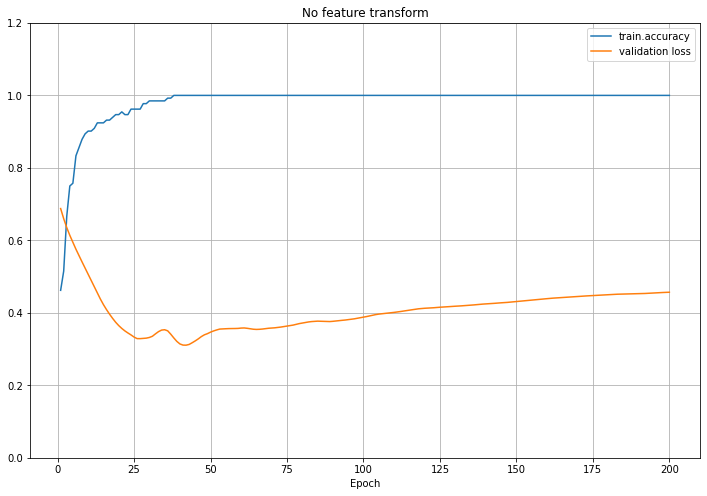

In [92]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='train.accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

In [94]:
model = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(48, activation='relu'),
    Dense(20, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),  
])

In [95]:
model.compile('adam', 'binary_crossentropy', ['accuracy'])

In [98]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint('sonar_best.h5', monitor='val_loss',
                     verbose=1, save_best_only=True)
es = EarlyStopping(patience = 20)

In [99]:
# epoch가 종료될 때 마다 callback 함수를 실행하도록 설정
hist = model.fit(X_train, y_train, validation_split=0.2,
          epochs=200, batch_size=100, verbose=1,
          callbacks=[mc, es])

Epoch 1/200
1/2 [==============>...............] - ETA: 0s - loss: 0.7072 - accuracy: 0.4500
Epoch 1: val_loss improved from inf to 0.71217, saving model to sonar_best.h5
2/2 [==============================] - 1s 199ms/step - loss: 0.7107 - accuracy: 0.4621 - val_loss: 0.7122 - val_accuracy: 0.4706
Epoch 2/200
1/2 [==============>...............] - ETA: 0s - loss: 0.6753 - accuracy: 0.5800
Epoch 2: val_loss improved from 0.71217 to 0.68478, saving model to sonar_best.h5
2/2 [==============================] - 0s 52ms/step - loss: 0.6688 - accuracy: 0.5985 - val_loss: 0.6848 - val_accuracy: 0.5294
Epoch 3/200
1/2 [==============>...............] - ETA: 0s - loss: 0.6316 - accuracy: 0.7300
Epoch 3: val_loss improved from 0.68478 to 0.66146, saving model to sonar_best.h5
2/2 [==============================] - 0s 53ms/step - loss: 0.6337 - accuracy: 0.7348 - val_loss: 0.6615 - val_accuracy: 0.7059
Epoch 4/200
1/2 [==============>...............] - ETA: 0s - loss: 0.6078 - accuracy: 0.7900
E

In [100]:
from tensorflow.keras.models import load_model

best_model = load_model('sonar_best.h5')

best_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.5780 - accuracy: 0.8571


[0.5780331492424011, 0.8571428656578064]

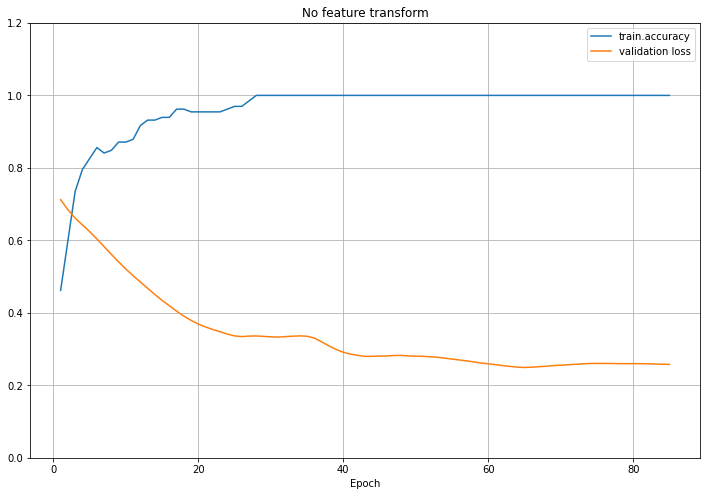

In [101]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)


plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='train.accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()